# Aircraft risk analysis

![airplane image](images/miguel-angel-sanz-yXE0zybDr-I-unsplash.jpg)

# Table of contents
1. [Overview](#Overview)
2. [Business problem](#Business-problem)
3. [Data understanding](#Data-understanding)
4. [Data preparation](#Data-preparation)
5. [Analysis](#Analysis)
6. [Conclusion](#Conclusion)
7. [Further discussions](#Further-discussions)

# Overview

This project aims to analyze historical aviation data from the National Transportation Safety Board (NTSB) spanning from 1962 to 2023. The dataset gathers near 88 889 records on aviation event. The project caters to a primary audience, the business stakeholders who need intuitve summaries and clear recommendations. The ultimate goal is to translate the findings into clear and actionable insights that support safer operational strategies. 

# Business problem

![flying airplane](images/robert-aardenburg-gnT4IGRS_1g-unsplash.jpg)

A company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. My task is to analyze aviation accident data to identify the safest aircraft models based on key factors, and to translate these findings into clear, actionable recommendations that the division can use to take informed decisions.

# Data understanding

The dataset from the NTSB includes detailed records for events, dating back to 1962, with unique identifiers for every aviation occurence. It captures key information such as the date and location of the event, the aircraft manufacturer and model, the damage extent, the fatality and injury counts, the weather condition, and the probable cause of the accident.

In [156]:
#import needed libraries
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [157]:
#import datasets
#dataset on aviation accidents records
aviation = pd.read_csv("AviationData.csv", encoding = 'latin1')

#dataset on US states
us_state = pd.read_csv("USState_Codes.csv")

In [158]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [159]:
us_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


## Aviation accidents dataset

Let's start by doing an exploration of the dataset so we can understand what we are working with.

In [160]:
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [161]:
aviation['Event.Date'].describe()

count          88889
unique         14782
top       1982-05-16
freq              25
Name: Event.Date, dtype: object

In [162]:
aviation['Investigation.Type'].value_counts()

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

In [163]:
aviation['Country'].value_counts()

Country
United States               82248
Brazil                        374
Canada                        359
Mexico                        358
United Kingdom                344
                            ...  
Mauritania                      1
Pacific Ocean                   1
Obyan                           1
Guernsey                        1
Turks and Caicos Islands        1
Name: count, Length: 219, dtype: int64

In [164]:
aviation['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [165]:
aviation['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

## US States dataset

This dataset contains informations about the US States and their abbreviation as well as abbreviation for othher countries and geographical spaces.

In [166]:
us_state.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [167]:
us_state['US_State'].describe()

count          62
unique         62
top       Alabama
freq            1
Name: US_State, dtype: object

# Data preparation

## Data cleaning

The overall data cleaning process ensures the dataset is accurate, consistent, and ready for analysis. This will be done by handling missing data in NTSB aviation dataset, correcting data types, but also standardizing key fields.

### Structural data cleaning

In [168]:
#clean and standardize column names for consistency
aviation.columns = (
    aviation.columns
    .str.strip()
    .str.lower()
    .str.replace('.', '_')
    .str.replace(' ', '_')
)

us_state.columns = (
    us_state.columns
    .str.strip()
    .str.lower()
    .str.replace('.', '_')
    .str.replace(' ', '_')
)

In [169]:
#identify columns with critical level of missing data
print((aviation.isnull().sum() / len(aviation)) * 100)

event_id                   0.000000
investigation_type         0.000000
accident_number            0.000000
event_date                 0.000000
location                   0.058500
country                    0.254250
latitude                  61.320298
longitude                 61.330423
airport_code              43.601570
airport_name              40.708074
injury_severity            1.124999
aircraft_damage            3.593246
aircraft_category         63.677170
registration_number        1.554748
make                       0.070875
model                      0.103500
amateur_built              0.114750
number_of_engines          6.844491
engine_type                7.982990
far_description           63.974170
schedule                  85.845268
purpose_of_flight          6.965991
air_carrier               81.271023
total_fatal_injuries      12.826109
total_serious_injuries    14.073732
total_minor_injuries      13.424608
total_uninjured            6.650992
weather_condition          5

In [170]:
#drop unnecessary columns and those with too many missing data
dropped_col = [
    'latitude', 'longitude', 'airport_code', 'airport_name',
    'far_description', 'schedule', 'air_carrier',
    'publication_date', 'report_status'
]

aviation = aviation.drop(columns = dropped_col)

In [171]:
#drop rows with too many missing data for important columns 
aviation = aviation.dropna(subset = ['model', 'registration_number', 'aircraft_category'])

In [172]:
#remove duplicates
key_columns = ['accident_number', 'event_date', 'make', 'model', 'location']
duplicates_key = aviation[aviation.duplicated(subset=key_columns, keep='first')]

duplicates = ['accident_number', 'event_date', 'make', 'model', 'location']
aviation = aviation.drop_duplicates(subset = duplicates, keep = 'first')

In [173]:
aviation['make'] = aviation['make'].str.strip().str.replace(r'[.,/]', '', regex=True)

### Content-level data cleaning

#### Handling missing values

In [174]:
#fill all categorical columns at once
fill_cols = [
    'location', 'country', 'aircraft_damage',
    'make', 'model', 'engine_type', 'purpose_of_flight', 'broad_phase_of_flight'
]

aviation[fill_cols] = aviation[fill_cols].fillna('Unknown')

In [175]:
#fill injury related column with 0
injury_columns = ['total_fatal_injuries', 'total_serious_injuries',
                  'total_minor_injuries', 'total_uninjured']
aviation[injury_columns] = aviation[injury_columns].fillna(0).astype(int)

In [176]:
#standardization and filling
aviation['amateur_built'] = (
    aviation['amateur_built']
    .str.strip()
    .str.upper()
    .fillna('Not reported')
)

aviation['engine_type'] = (
    aviation['engine_type']
    .replace({'UNK': 'Unknown'})
    .fillna('Unknown')
)

aviation['weather_condition'] = (
    aviation['weather_condition']
    .replace({'Unk': 'Unknown', 'UNK': 'Unknown' })
    .fillna('Unknown')
)

In [177]:
aviation['number_of_engines'] = aviation['number_of_engines'].fillna(1)

In [178]:
aviation['injury_severity'] = aviation['injury_severity'].fillna('Unavailable')

#clean data from removing text inside parentheses
aviation['injury_severity'] = aviation['injury_severity'].str.split("(").str[0]

#### Standardize key categorical fields and filter out irrelevant records

In [179]:
aviation['make'] = (
    aviation['make']
    .str.strip()
    .str.upper()
)

aviation['model'] = (
    aviation['model']
    .str.strip()
    .str.upper()
    .str.replace(r'[-_\s]+', '', regex = True)
)

Excluding test, ferry, and unknown purpose of flight helps focus on standard aircraft usage. This will ensure more accurate results when evaluating aircraft safety performance.

In [180]:
test_flight = aviation['purpose_of_flight'].str.contains('Test|Ferry|Unknown', na = False)
aviation = aviation[~test_flight]

## Calculations

In [181]:
aviation['event_date'] = pd.to_datetime(aviation['event_date'])

aviation['event_year'] = aviation['event_date'].dt.year
aviation['event_month'] = aviation['event_date'].dt.month_name()

In [182]:
col_conversion = [
    'number_of_engines', 'total_fatal_injuries',
    'total_serious_injuries', 'total_minor_injuries',
    'total_uninjured'
]

aviation[col_conversion] = aviation[col_conversion].astype(int)

In [183]:
num_cols = [
    'total_fatal_injuries', 'total_serious_injuries', 
    'total_minor_injuries', 'total_uninjured'
]

aviation['total_involved'] = aviation[num_cols].sum(axis = 1).astype(int)

In [184]:
damage_severity ={
    'Destroyed' : 3,
    'Substantial' : 2,
    'Minor' : 1
}

aviation['damage_level'] = aviation['aircraft_damage'].map(damage_severity).fillna(0).astype(int)

## Merging datasets

In [185]:
#split abbreviations from cities in locations
aviation['state'] = aviation['location'].str.split(',').str[1].str.strip()

In [186]:
cleaned_aviation = aviation.merge(
    us_state,
    left_on = 'state',
    right_on = 'abbreviation',
    how = 'left'
).drop('abbreviation', axis = 1)

In [187]:
cleaned_aviation.to_csv('CleanedAviationData.csv', index = False)

In [188]:
cleaned_aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26134 entries, 0 to 26133
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                26134 non-null  object        
 1   investigation_type      26134 non-null  object        
 2   accident_number         26134 non-null  object        
 3   event_date              26134 non-null  datetime64[ns]
 4   location                26134 non-null  object        
 5   country                 26134 non-null  object        
 6   injury_severity         26134 non-null  object        
 7   aircraft_damage         26134 non-null  object        
 8   aircraft_category       26134 non-null  object        
 9   registration_number     26134 non-null  object        
 10  make                    26134 non-null  object        
 11  model                   26134 non-null  object        
 12  amateur_built           26134 non-null  object

In [189]:
cleaned_aviation.head()

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,registration_number,...,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,event_year,event_month,total_involved,damage_level,state,us_state
0,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,N2482N,...,0,2,VMC,Takeoff,1982,January,2,2,WA,Washington
1,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,N7967Q,...,0,2,IMC,Landing,1982,January,2,2,NJ,New Jersey
2,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,N14779,...,1,0,IMC,Cruise,1982,January,1,3,LA,Louisiana
3,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,N758SK,...,0,0,IMC,Takeoff,1982,January,1,3,TX,Texas
4,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,Fatal,Destroyed,Airplane,N4876K,...,0,0,IMC,Cruise,1982,January,1,3,OK,Oklahoma


# Analysis

In [190]:
#import needed librairies
import matplotlib
import matplotlib.pyplot as plt

#output the graph within the document
%matplotlib inline

In [191]:
#filter the accidents only from the dataset
accidents = cleaned_aviation[cleaned_aviation['investigation_type'] == 'Accident']

## Aircraft manufacturers with highest number of accidents

We are going to start by groupin aviation accidents by aircraft manufacturer and count how many times each brand appeared in the dataset.

In [192]:
#group by make and accidents count
make_accidents = accidents.groupby('make').size().reset_index(name = 'accidents_count')

#get the top 10 of manufacturers by the number of accidents
top_make_by_accidents = make_accidents.sort_values(by = 'accidents_count', ascending = False).head(10)

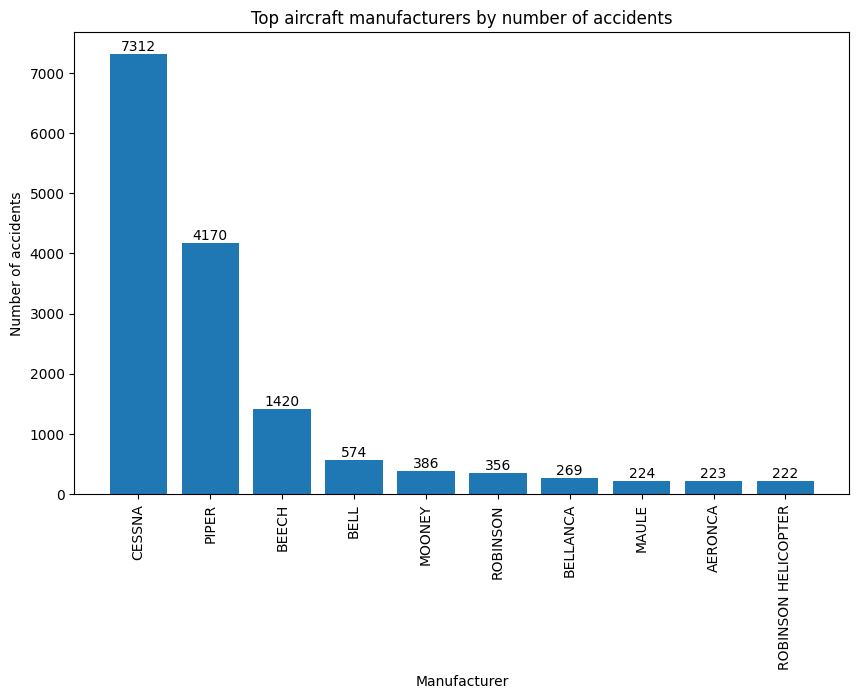

In [193]:
#create plot
fig_1, ax_1 = plt.subplots(figsize = (10, 6))

make_bars = ax_1.bar(top_make_by_accidents['make'], top_make_by_accidents['accidents_count'])

ax_1.set_title('Top aircraft manufacturers by number of accidents')
ax_1.set_xlabel('Manufacturer')
ax_1.set_ylabel('Number of accidents')
ax_1.bar_label(make_bars, labels = top_make_by_accidents['accidents_count'])

#rotate labels for x-axis
plt.xticks(rotation = 90)

plt.show()

Cessna has the highest number of reported accidents, followed by Piper and Beechcraft. While Cessna planes are involved in more accidents, this could reflect their popularity rather than poor safety performance. In order to clear up this confusion, analysis of severity and fatality rates is are gonna be needed.

## Manufacturers with highest number of destroyed aircraft

We are now going to filter for "Destroyed" aircraft damage and compared it to total accidents per manufacturer.

In [194]:
#filter aircraft damage
destroyed_accidents = accidents[accidents['aircraft_damage'] == 'Destroyed']

In [195]:
make_destroyed = destroyed_accidents.groupby('make').size().reset_index(name = 'destroyed_count')
top_makes_destroyed = make_destroyed.sort_values(by = 'destroyed_count', ascending = False).head(10)

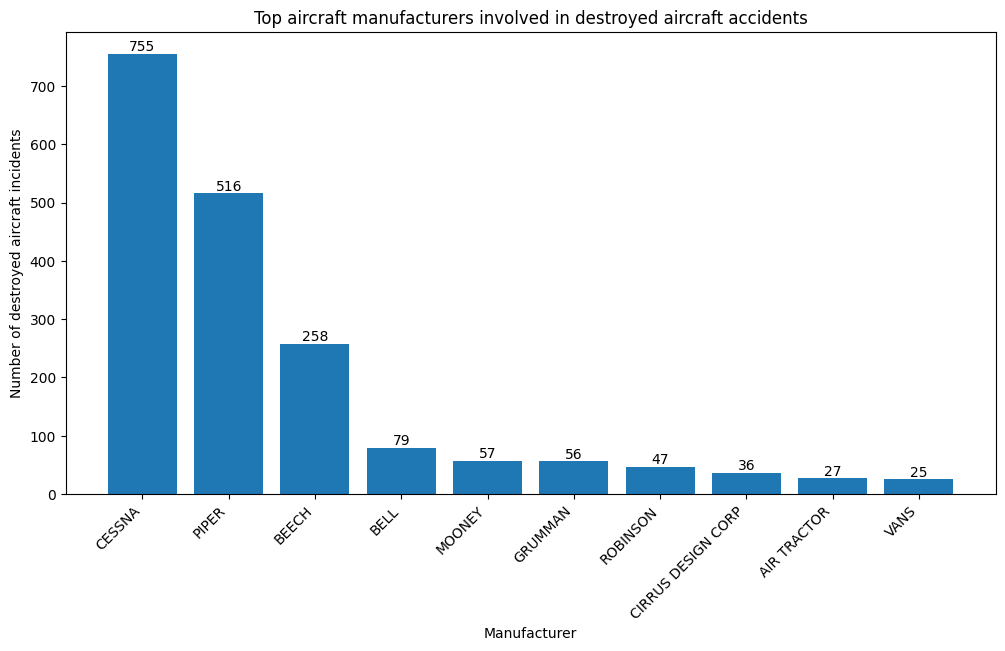

In [196]:
#create plot
fig_2, ax_2 = plt.subplots(figsize=(12, 6))
bars = ax_2.bar(top_makes_destroyed['make'], top_makes_destroyed['destroyed_count'])

ax_2.set_title('Top aircraft manufacturers involved in destroyed aircraft accidents')
ax_2.set_xlabel('Manufacturer')
ax_2.set_ylabel('Number of destroyed aircraft incidents')
ax_2.bar_label(bars, labels=top_makes_destroyed['destroyed_count'])
plt.xticks(rotation=45, ha='right')

plt.show()

Some manufacturers has a disproportionately high number of destroyed aircraft in accidents. Planes from those manufacturers may cost more to insure and repair which could affect long-term operational costs.

## Models with the highest fatality rate

In [197]:
model_stats = accidents.groupby('model').agg(
    total_accidents = ('model', 'size'),
    total_fatalities = ('total_fatal_injuries', 'sum')
).reset_index()

In [198]:
model_stats['fatality_rate'] = (model_stats['total_fatalities'] / model_stats['total_accidents']).round(2).fillna(0)

In [199]:
top_models = model_stats[model_stats['total_accidents'] >= 10]

In [200]:
top_fatal_models = top_models.sort_values(by = 'fatality_rate', ascending = False).head(10)
top_fatal_models

,model,total_accidents,total_fatalities,fatality_rate
2746,PA31T,14,26,1.86
501,560,10,14,1.40
224,205,11,15,1.36
2739,PA31,17,21,1.24
3613,T310R,14,17,1.21
3617,T337G,10,12,1.20
378,340A,26,31,1.19
679,A35,11,13,1.18
983,B60,11,13,1.18
2757,PA32R300,46,53,1.15


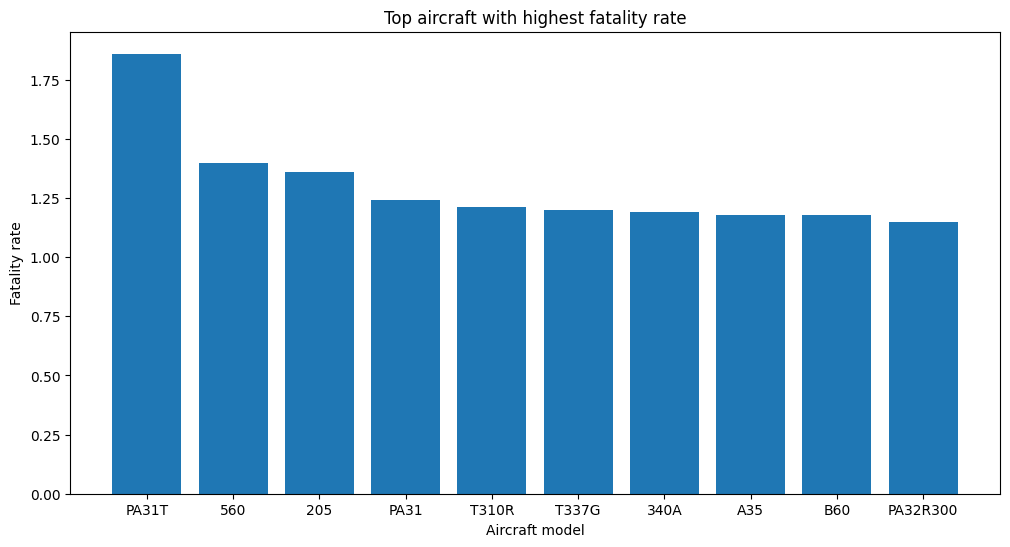

In [201]:
fig_3, ax_3 = plt.subplots(figsize = (12, 6))

model_bars = ax_3.bar(top_fatal_models['model'], top_fatal_models['fatality_rate'])
ax_3.set_xlabel('Aircraft model')
ax_3.set_ylabel('Fatality rate')
ax_3.set_title('Top aircraft with highest fatality rate')

plt.show()


Model like the Piper PA-31T has higher fatality rates compared to others with similar accident counts. Even if a model has fewer accidents, a high fatality rate suggests increased risk.

## Change in aviation accidents over time

In [202]:
year_accidents = accidents.groupby('event_year').size().reset_index(name = 'accident_count')
year_accidents.head(5)

,event_year,accident_count
0,1982,2804
1,1983,6
2,1984,4
3,1985,7
4,1986,7


In [203]:
year_fatalities = accidents.groupby('event_year')['total_fatal_injuries'].sum().reset_index(name = 'total_fatalities')
year_fatalities.head(5)

,event_year,total_fatalities
0,1982,1105
1,1983,13
2,1984,2
3,1985,19
4,1986,11


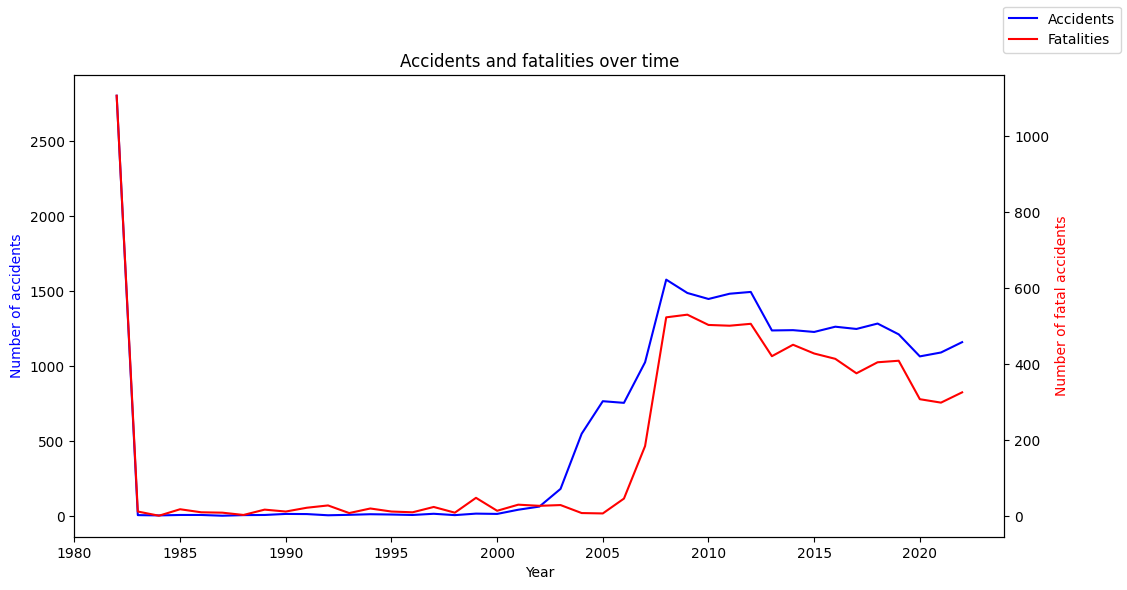

In [204]:
fig_4, ax_4 = plt.subplots(figsize = (12, 6))

ax_4.plot(year_accidents['event_year'], year_accidents['accident_count'], label = 'Accidents', color = 'blue')
ax_4.set_xlabel('Year')
ax_4.set_ylabel('Number of accidents', color = 'blue')

ax_5 = ax_4.twinx()
ax_5.plot(year_fatalities['event_year'], year_fatalities['total_fatalities'], label = 'Fatalities', color = 'red')
ax_5.set_ylabel('Number of fatal accidents', color = 'red')

plt.title('Accidents and fatalities over time')
fig_4.legend()

plt.show()

There has been a steady decline in aviation accidents since the 1980s, indicating improving safety standards. Newer aircraft models benefit from improved design and regulations.


## Injury severity distribution by aircraft category

In [205]:
severity_by_type = accidents.groupby(
    ['aircraft_category', 'injury_severity']
).size().unstack(fill_value=0)

In [206]:
top_categories = severity_by_type.sum(axis = 1).sort_values(ascending = False).head(5).index
severity_by_type = severity_by_type.loc[top_categories]

In [207]:
severity_order = ['Fatal', 'Serious', 'Minor', 'Non-Fatal']
severity_by_type = severity_by_type.reindex(columns = severity_order, fill_value = 0)
severity_by_type

injury_severity,Fatal,Serious,Minor,Non-Fatal
aircraft_category,,,,
Airplane,3910,107,151,18094
Helicopter,422,17,28,1959
Glider,80,2,4,408
Balloon,17,6,0,201
Gyrocraft,34,0,5,120


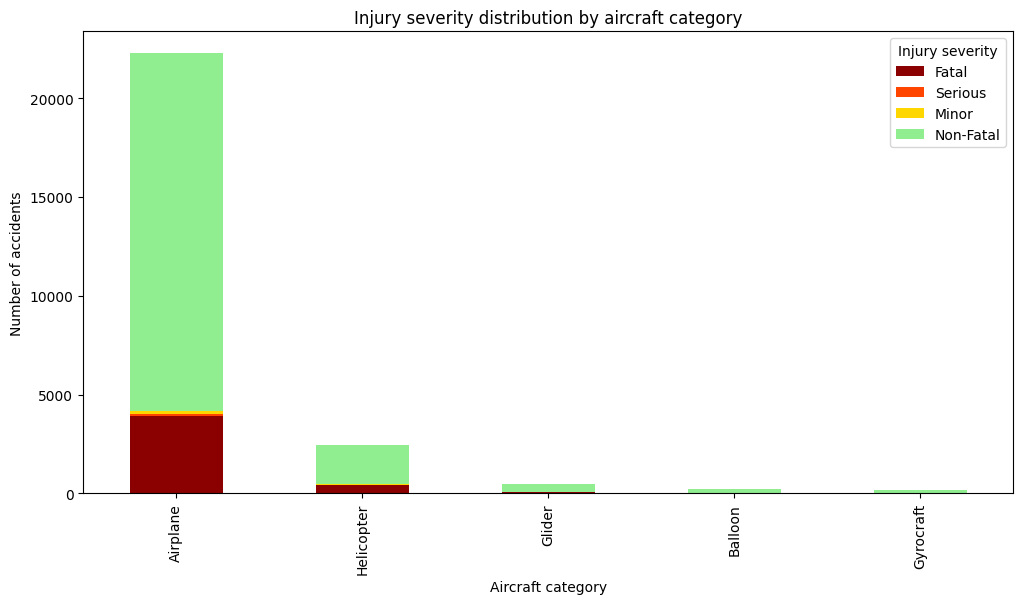

In [208]:
fig_5, ax_6 = plt.subplots(figsize = (12, 6))
bars = severity_by_type.plot.bar(stacked = True, ax = ax_6, color = [
    'darkred', 'orangered', 'gold', 'lightgreen'
])

ax_6.set_title('Injury severity distribution by aircraft category')
ax_6.set_xlabel('Aircraft category')
ax_6.set_ylabel('Number of accidents')

plt.legend(title='Injury severity')
plt.show()

Airplanes are involved in the most accidents overall due to their widespread use across personal, instructional, and business operations however they also have the highest number of non-fatal outcomes which suggests that while crashes are more frequent survival rates are relatively high

## Type of built with safest track records

In [209]:
accidents = accidents[accidents['injury_severity'].isin(severity_order)]
accidents['fatal'] = accidents['injury_severity'] == 'Fatal'
accidents_reviewed = accidents[accidents['amateur_built'] != 'Not reported']

In [210]:
built_stats = accidents_reviewed.groupby('amateur_built').agg(
    total_accidents = ('fatal', 'size'),
    fatal_accidents = ('fatal', 'sum')
).reset_index()

In [211]:
built_stats['fatality_rate'] = (built_stats['fatal_accidents'] / built_stats['total_accidents']).round(2).fillna(0)
built_stats

,amateur_built,total_accidents,fatal_accidents,fatality_rate
0,NO,22574,3828,0.17
1,YES,3272,711,0.22


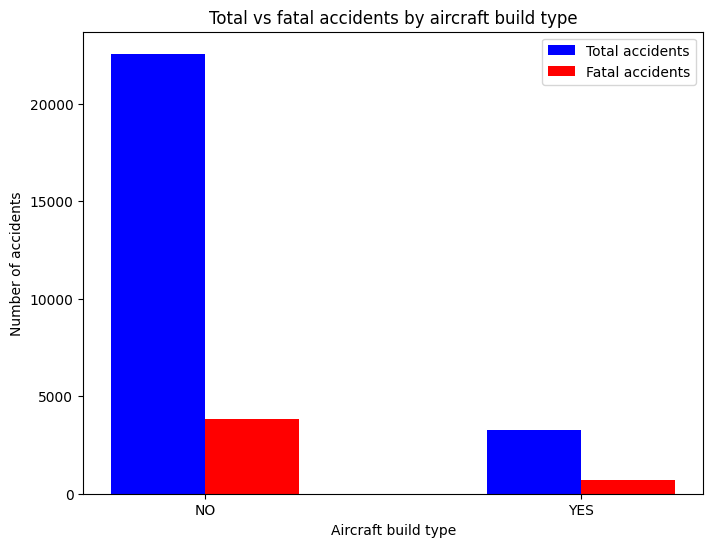

In [212]:
bar_width = 0.25
index = built_stats.index

fig_6, ax_7 = plt.subplots(figsize=(8, 6))

bar1 = ax_7.bar(index, built_stats['total_accidents'], bar_width, label='Total accidents', color='blue')
bar2 = ax_7.bar(index + bar_width, built_stats['fatal_accidents'], bar_width, label='Fatal accidents', color='red')

ax_7.set_xlabel('Aircraft build type')
ax_7.set_ylabel('Number of accidents')
ax_7.set_title('Total vs fatal accidents by aircraft build type')
ax_7.set_xticks(index + bar_width / 2)
ax_7.set_xticklabels(built_stats['amateur_built'])
ax_7.legend()

plt.show()

Amateur-built aircraft has a higher fatality rate despite being involved in fewer overall accidents. Unless there’s a compelling reason to buy amateur-built aircraft, factory-built planes appear safer and more predictable in terms of risk.

# Conclusion

Based on the analysis conducted, here are three key recommendations to help the company make informed decisions when purchasing and operating aircraft:

1. Prioritize factory-built aircraft over amateur-built models
    * Unless there is a specific operational or cost-related reason to consider amateur-built aircraft, the company should prioritize purchasing factory-built models, which generally offer better safety records, more predictable maintenance and repair processes, and easier access to manufacturer support and spare parts.
2. Avoid high-risk aircraft models with elevated fatality rates
    * Avoid purchasing or limit exposure to these high-risk models. Instead, opt for models with lower historical fatality rates and higher survival rates in accidents. You may also consider focusing on more modern models with updated safety features and better-engineered crash survivability.
3. Favor aircraft with lower accidents count
    * Focus on acquiring aircraft category that have lower accidents count but also lower fatality rate. Additionally, you could analyze maintenance history and engine type to further refine risk assessment.

# Further discussions

If further analysis had been conducted, there would have been additional discussions that could provide deeper insights into aircraft risk and safety trends.

1. Identify aircraft models with high recurrence of mechanical failures
    * Some aircraft models may have recurring mechanical issues that increase risk over time. Identifying these can help avoid purchasing or operating planes prone to system failures.
2.  Understand how weather conditions influence accident severity 
    * Weather plays a major role in aviation safety. Analyzing how different weather conditions affect accident outcomes helps assess operational risk under various flying environments.
3. Predict likelihood of fatalities based on phase of flight
    * Accidents during specific phases such as takeoff or landing may carry higher fatality risks. This analysis could reveal opportunities for targeted training or protocol improvements.